In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os
from PIL import Image
import numpy as np

In [10]:
foreground = pd.read_csv("../data/processed/newTrain.csv")
foreground.drop("label", axis=1, inplace=True)

In [ ]:
for i in range(len(foreground)):
    plt.figure()
    img = plt.imshow(foreground.values[i].reshape((28,28)), cmap='gray')
    plt.savefig('../data/train_pics/pic{}.png'.format(i))

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


In [9]:
vidcap = cv2.VideoCapture('../data/enrichment/Y.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("../data/enrichment_pics/Y"+str(count)+".jpg", image)
    return hasFrames
sec = 0
frameRate = 1/30
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [22]:
## Resize a (28,28)

from resizeimage import resizeimage

for i in range(1,394):
    with open('../data/enrichment_pics/Y{}.jpg'.format(i), 'r+b') as f:
        with Image.open(f) as image:
            cover = resizeimage.resize_cover(image, [28, 28])
            cover.save('../data/resized_enrichment/Y{}.jpeg'.format(i), image.format)

In [28]:
for i in range(1,393):
    with open('../data/resized_enrichment/Y{}.jpeg'.format(i), 'r+b') as f:
        with Image.open(f) as image:
            img = image.convert('L')
            img.save('../data/enrichment_bw/Y{}.jpeg'.format(i))


In [29]:
## Importo nuevos df

In [38]:
A = pd.DataFrame()
for i in range(1,302):
    with open('../data/enrichment_bw/A{}.jpeg'.format(i), 'r+b') as f:
        with Image.open(f) as image:
            arr = np.array(image)
            A = A.append(pd.Series(arr.flatten()), ignore_index=True)
A["label"] = "A"

In [39]:
B = pd.DataFrame()
for i in range(1,389):
    with open('../data/enrichment_bw/B{}.jpeg'.format(i), 'r+b') as f:
        with Image.open(f) as image:
            arr = np.array(image)
            B = B.append(pd.Series(arr.flatten()), ignore_index=True)
B["label"] = "B"

In [40]:
F = pd.DataFrame()
for i in range(1,370):
    with open('../data/enrichment_bw/F{}.jpeg'.format(i), 'r+b') as f:
        with Image.open(f) as image:
            arr = np.array(image)
            F = F.append(pd.Series(arr.flatten()), ignore_index=True)
F["label"] = "F"

In [41]:
T = pd.DataFrame()
for i in range(1,343):
    with open('../data/enrichment_bw/T{}.jpeg'.format(i), 'r+b') as f:
        with Image.open(f) as image:
            arr = np.array(image)
            T = T.append(pd.Series(arr.flatten()), ignore_index=True)
T["label"] = "T"

In [42]:
V = pd.DataFrame()
for i in range(1,433):
    with open('../data/enrichment_bw/V{}.jpeg'.format(i), 'r+b') as f:
        with Image.open(f) as image:
            arr = np.array(image)
            V = A.append(pd.Series(arr.flatten()), ignore_index=True)
V["label"] = "V"

In [43]:
Y = pd.DataFrame()
for i in range(1,392):
    with open('../data/enrichment_bw/Y{}.jpeg'.format(i), 'r+b') as f:
        with Image.open(f) as image:
            arr = np.array(image)
            Y = Y.append(pd.Series(arr.flatten()), ignore_index=True)
Y["label"] = "Y"

In [45]:
heterogeneos = pd.concat([A,B,F,T,V,Y])

In [46]:
heterogeneos.to_csv("../data/processed/heterogeneos.csv", index=False)

## Pruebo...

In [80]:
background = pd.read_csv("../data/processed/background.csv")
foreground = pd.read_csv("../data/processed/newTrain.csv")
foreground_test = pd.read_csv("../data/processed/newTest.csv")
heterogeneos = pd.read_csv("../data/processed/heterogeneos.csv")

In [81]:
X_background = background.drop("label", axis=1)
X_foreground = foreground.drop("label", axis=1)
X_heterogeneos = heterogeneos.drop("label", axis=1)

In [82]:
X_background.columns = X_foreground.columns
X_heterogeneos.columns = X_foreground.columns

In [83]:
# New DFs

new_fg = X_foreground
new_fg["label"] = foreground["label"]

new_bg = X_background
new_bg["label"] = background["label"]

new_heterogeneos = X_heterogeneos
new_heterogeneos["label"] = heterogeneos["label"]


In [84]:
data = pd.concat([new_fg, new_bg, foreground_test, new_heterogeneos])

data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,197.0,195.0,196.0,195.0,197.0,196.0,195.0,196.0,196.0,196.0,...,65.0,182.0,213.0,211.0,212.0,212.0,213.0,213.0,213.0,A
1,142.0,144.0,144.0,146.0,147.0,149.0,150.0,151.0,153.0,154.0,...,179.0,179.0,180.0,181.0,182.0,182.0,182.0,183.0,183.0,A
2,198.0,200.0,201.0,200.0,199.0,198.0,198.0,197.0,198.0,199.0,...,99.0,99.0,98.0,99.0,98.0,100.0,100.0,101.0,100.0,A
3,231.0,232.0,234.0,237.0,238.0,241.0,243.0,244.0,248.0,249.0,...,66.0,199.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,A
4,147.0,149.0,150.0,152.0,153.0,153.0,152.0,153.0,154.0,154.0,...,165.0,166.0,165.0,166.0,169.0,167.0,133.0,135.0,140.0,A


In [85]:
data.to_csv("../data/processed/heterogeneo_dataset.csv", index=False)

In [62]:
data.shape

(16996, 785)

### NEURONAL

In [63]:
X = data.drop("label", axis=1)
y = data["label"]

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [239]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [150]:
img_rows, img_cols = 28, 28
num_classes = 7

# DF to np array. Keras needs one-hot encoded y for multilabel classification.

X_train_vector = X_train.values.reshape((X_train.shape[0], img_rows, img_cols))
X_test_vector = X_test.values.reshape((X_test.shape[0], img_rows, img_cols))


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], 1, img_rows, img_cols)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], img_rows, img_cols, 1)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
'''
# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train_vector = X_train_vector.astype('float32') / 255
X_test_vector = X_test_vector.astype('float32') / 255'''

print('x_train shape:', X_train_vector.shape)
print(X_train_vector.shape[0], 'train samples')
print(X_test_vector.shape[0], 'test samples')

# convert class vectors to class matrices
y_train_vector = y_train.values
y_test_vector = y_test.values

x_train shape: (13596, 28, 28, 1)
13596 train samples
3400 test samples


In [154]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [155]:
# Fit the NN
batch_size = 16
epochs = 2

model.fit(X_train_vector, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_vector, y_test_vector))

Train on 13596 samples, validate on 3400 samples
Epoch 1/2
13596/13596 [==============================] - 32s 2ms/step - loss: 0.6654 - accuracy: 0.9109 - val_loss: 0.0554 - val_accuracy: 0.9774
Epoch 2/2
13596/13596 [==============================] - 32s 2ms/step - loss: 0.0927 - accuracy: 0.9707 - val_loss: 0.0304 - val_accuracy: 0.9776


In [156]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_vector)
predict = np.argmax(y_pred, axis=1)
reality = np.argmax(y_test_vector, axis=1)

print("Accuracy score: ", accuracy_score(reality, predict))
model.save("../output/models/enrichedData_10epochs.json")

Accuracy score:  0.9776470588235294


#### Es una mierda, no aprende. Voy a hacer la transformada de Fourier

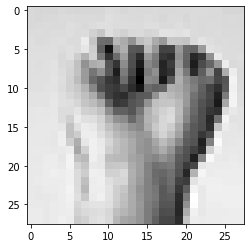

In [85]:
plt.figure()
plt.imshow(sign, cmap="gray")

In [152]:
def getFourier(X):
    fft2d = np.log(np.abs(np.fft.fft2(X.reshape((28,28)))))
    #fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]
    return fft2d.flatten().reshape((28,28,1))
vector = np.apply_along_axis(lambda X: getFourier(X), 1, prueba)


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [130]:
img_fft = np.concatenate([prueba,vector], axis=1)

In [131]:
img_fft.shape

(16996, 1568)

In [22]:
X["vector"] = lambda X: [e for e in X.iloc[i][:-1]]
X.drop("vector", axis=1, inplace=True)

In [160]:
def funcion(row):
    array = []
    for number in row:
        array.append(number)
    return array
X["vector"] = X.apply(funcion,axis=1)

In [86]:
data = pd.read_csv("../data/processed/heterogeneo_dataset.csv")

In [78]:
X = pd.read_csv("../data/processed/datawithvectors.csv")
X.vector = vector


In [153]:
X = vector
y = data.label
y = pd.get_dummies(y)

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_vector = y_train.values
y_test_vector = y_test.values

In [140]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split


num_classes = 7

model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('relu'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [141]:
# Fit the NN
batch_size = 32
epochs = 5

model.fit(X_train, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test_vector))

Train on 13596 samples, validate on 3400 samples
Epoch 1/5
13596/13596 [==============================] - 14s 1ms/step - loss: nan - accuracy: 0.2201 - val_loss: nan - val_accuracy: 0.1021
Epoch 2/5
13596/13596 [==============================] - 14s 1ms/step - loss: nan - accuracy: 0.1038 - val_loss: nan - val_accuracy: 0.1021
Epoch 3/5
13596/13596 [==============================] - 14s 1ms/step - loss: nan - accuracy: 0.1038 - val_loss: nan - val_accuracy: 0.1021
Epoch 4/5
13596/13596 [==============================] - 14s 1ms/step - loss: nan - accuracy: 0.1038 - val_loss: nan - val_accuracy: 0.1021
Epoch 5/5
13596/13596 [==============================] - 13s 990us/step - loss: nan - accuracy: 0.1038 - val_loss: nan - val_accuracy: 0.1021


In [150]:
img_rows, img_cols = 28, 28
num_classes = 7


# DF to np array. Keras needs one-hot encoded y for multilabel classification.

X_train_vector = X_train.reshape((X_train.shape[0], img_rows, img_cols))
X_test_vector = X_test.reshape((X_test.shape[0], img_rows, img_cols))


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], 1, img_rows, img_cols)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], img_rows, img_cols, 1)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train_vector = X_train_vector.astype('float32') / 255
X_test_vector = X_test_vector.astype('float32') / 255

print('x_train shape:', X_train_vector.shape)
print(X_train_vector.shape[0], 'train samples')
print(X_test_vector.shape[0], 'test samples')

# convert class vectors to class matrices
y_train_vector = y_train.values
y_test_vector = y_test.values

x_train shape: (13596, 28, 28, 1)
13596 train samples
3400 test samples


In [155]:
X_train.shape

(13596, 28, 28, 1)

In [159]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [161]:
# Fit the NN
batch_size = 16
epochs = 5

model.fit(X_train, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test_vector))

Train on 13596 samples, validate on 3400 samples
Epoch 1/5
13596/13596 [==============================] - 35s 3ms/step - loss: nan - accuracy: 0.1033 - val_loss: nan - val_accuracy: 0.1041
Epoch 2/5
 1200/13596 [=>............................] - ETA: 32s - loss: nan - accuracy: 0.0958

KeyboardInterrupt: 

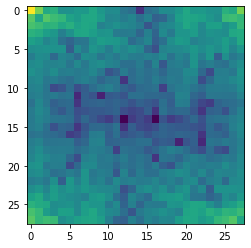

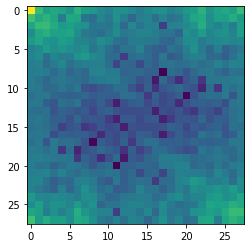

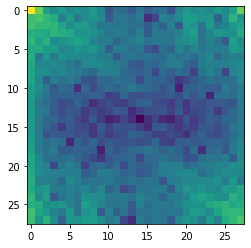

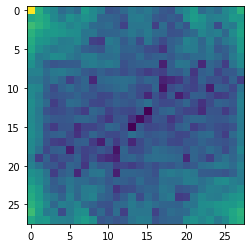

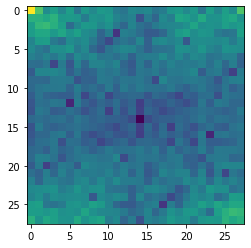

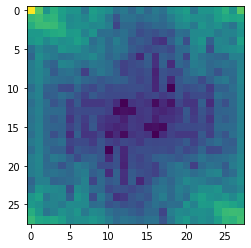

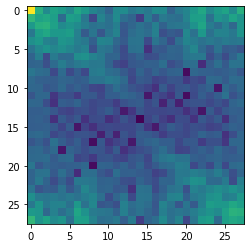

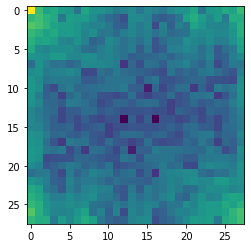

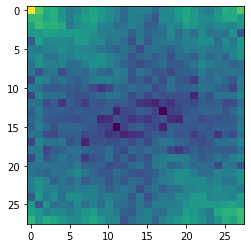

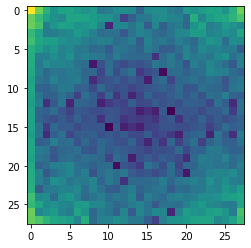

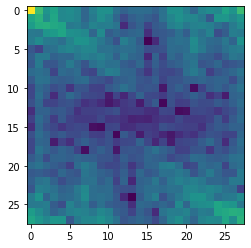

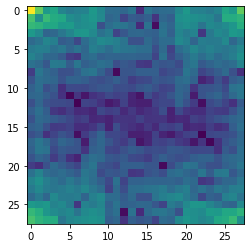

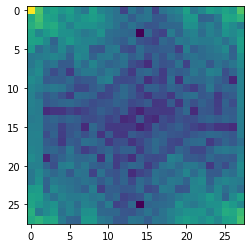

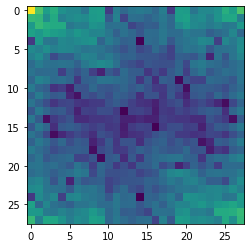

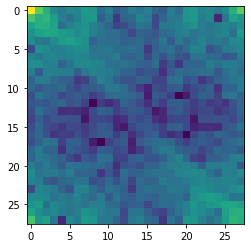

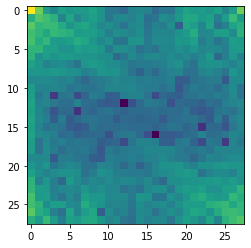

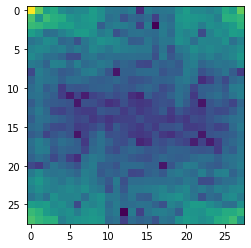

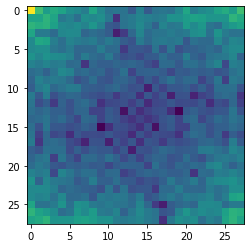

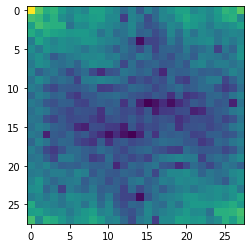

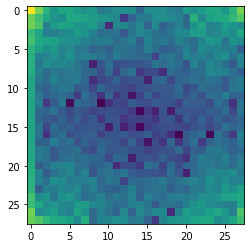

In [169]:
for i in range(20):
    plt.figure()
    plt.imshow(X[i].reshape((28,28)))

#### El modelo no es capaz de sacar un modelo matemático fiable por la similiritud de datos.